In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [ ]:
load_path = r"C:\Documents\GitHubRepos\hospital-emergency-room\data\load\Hospital_ER_Cleaned.csv"

# Define the directory to save images
output_directory = r"C:\Documents\GitHubRepos\hospital-emergency-room\assets\notebook-images\analysis"

# Ensure the directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

In [18]:
# Load dataset
try:
    df = pd.read_csv(load_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found: {load_path}")


Data loaded successfully.


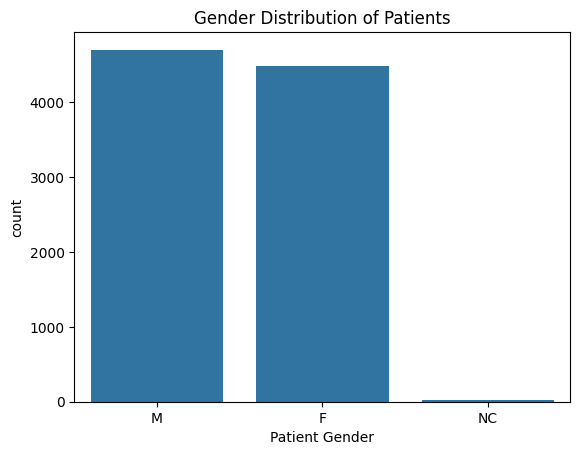

In [35]:
# Gender Distribution of Patients
sns.countplot(x='Patient Gender', data=df)
plt.title('Gender Distribution of Patients')
plt.show()
plt.close()

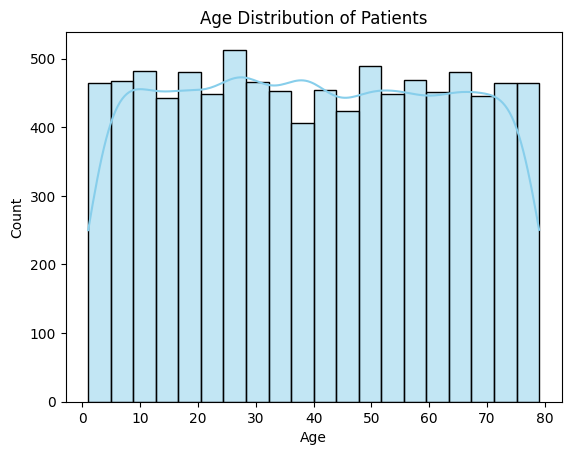

In [ ]:
# Age Distribution of Patients
sns.histplot(df['Patient Age'], kde=True, color='skyblue', bins=20)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
plt.close()


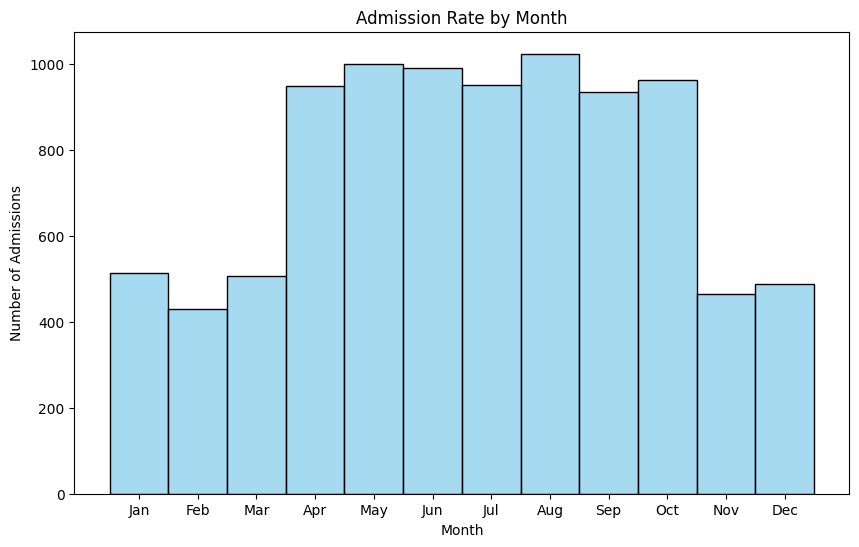

Month with the highest admission rate: 8 with 1024 admissions.


In [ ]:
# Ensure 'Patient Admission Date' is in datetime format
df['Patient Admission Date'] = pd.to_datetime(df['Patient Admission Date'], errors='coerce')

# Extract the month from the 'Patient Admission Date'
df['Admission Month'] = df['Patient Admission Date'].dt.month

# Calculate the count of admissions per month
admission_counts = df['Admission Month'].value_counts().sort_index()

# Plot the histogram of admissions per month
plt.figure(figsize=(10, 6))
sns.histplot(df['Admission Month'], kde=False, bins=12, color='skyblue', discrete=True)
plt.title('Admission Rate by Month')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()
plt.close()

# Display the month with the highest admission rate
highest_admission_month = admission_counts.idxmax()
highest_admission_count = admission_counts.max()

print(f"Month with the highest admission rate: {highest_admission_month} with {highest_admission_count} admissions.")


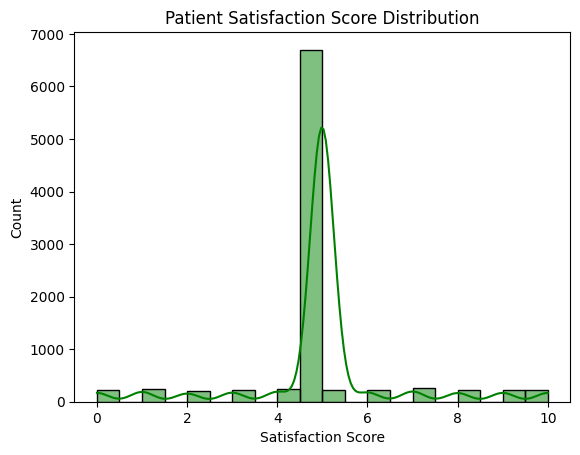

In [ ]:
# Patient Satisfaction Score Distribution
sns.histplot(df['Patient Satisfaction Score'], kde=True, color='green', bins=20)
plt.title('Patient Satisfaction Score Distribution')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.show()
plt.close()


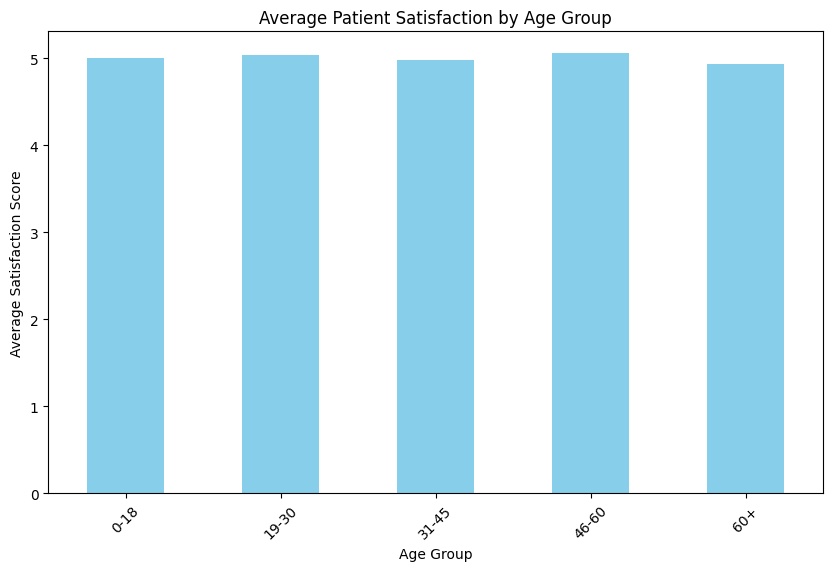

In [22]:
# Group by Age Group and calculate the average Satisfaction Score
age_group_satisfaction = df.groupby('Age Group', observed=True)['Patient Satisfaction Score'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
age_group_satisfaction.plot(kind='bar', color='skyblue')
plt.title('Average Patient Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation=45)
plt.show()
plt.savefig(os.path.join(output_directory, 'age_group_satisfaction.png'))
plt.close()


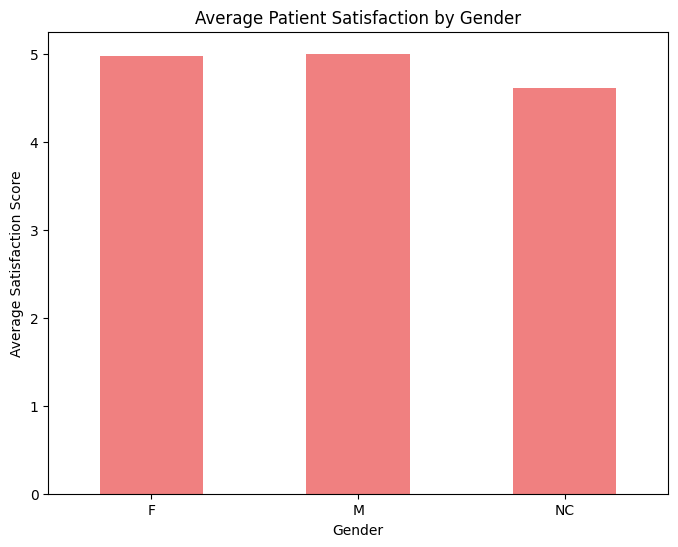

In [ ]:
# Group by Gender and calculate the average Satisfaction Score
gender_satisfaction = df.groupby('Patient Gender', observed=True)['Patient Satisfaction Score'].mean()

# Plot the results
plt.figure(figsize=(8, 6))
gender_satisfaction.plot(kind='bar', color='lightcoral')
plt.title('Average Patient Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation=0)
plt.show()
plt.close()


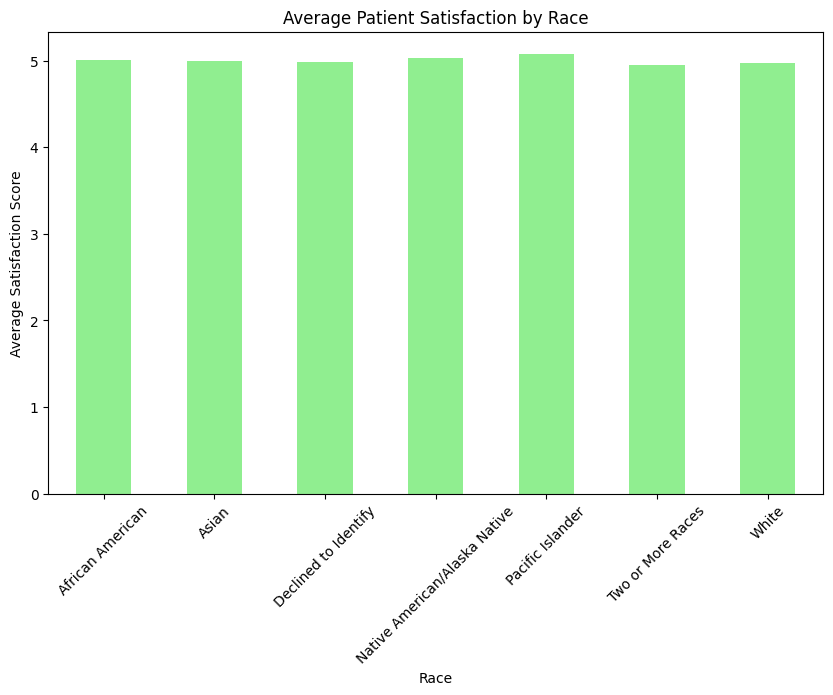

In [ ]:
# Group by Race and calculate the average Satisfaction Score
race_satisfaction = df.groupby('Patient Race', observed=True)['Patient Satisfaction Score'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
race_satisfaction.plot(kind='bar', color='lightgreen')
plt.title('Average Patient Satisfaction by Race')
plt.xlabel('Race')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation=45)
plt.show()
plt.close()


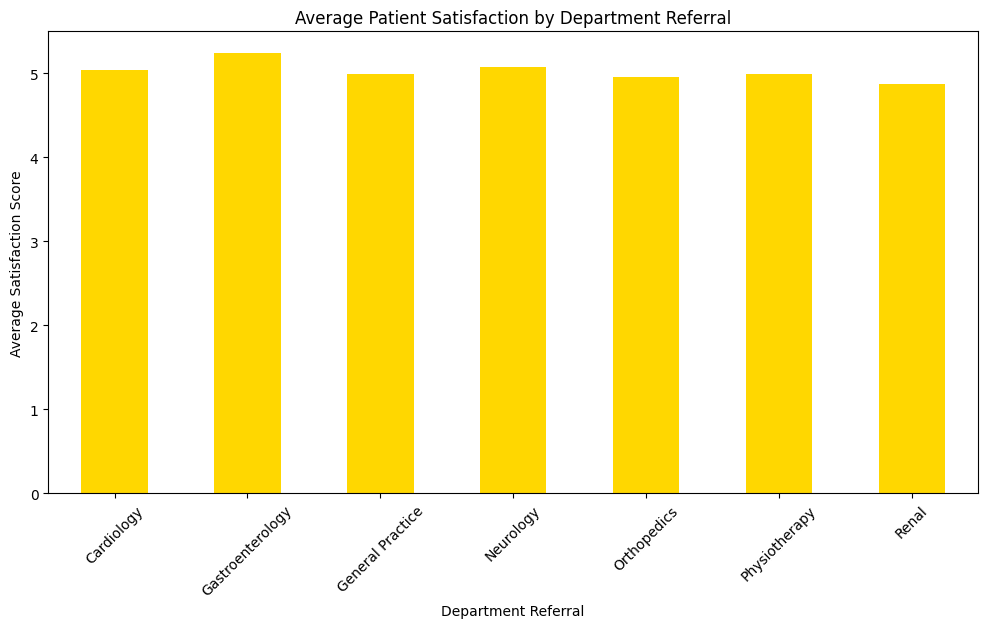

In [ ]:
# Group by Department Referral and calculate the average Satisfaction Score
referral_satisfaction = df.groupby('Department Referral')['Patient Satisfaction Score'].mean()

# Plot the results
plt.figure(figsize=(12, 6))
referral_satisfaction.plot(kind='bar', color='gold')
plt.title('Average Patient Satisfaction by Department Referral')
plt.xlabel('Department Referral')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation=45)
plt.show()
plt.close()


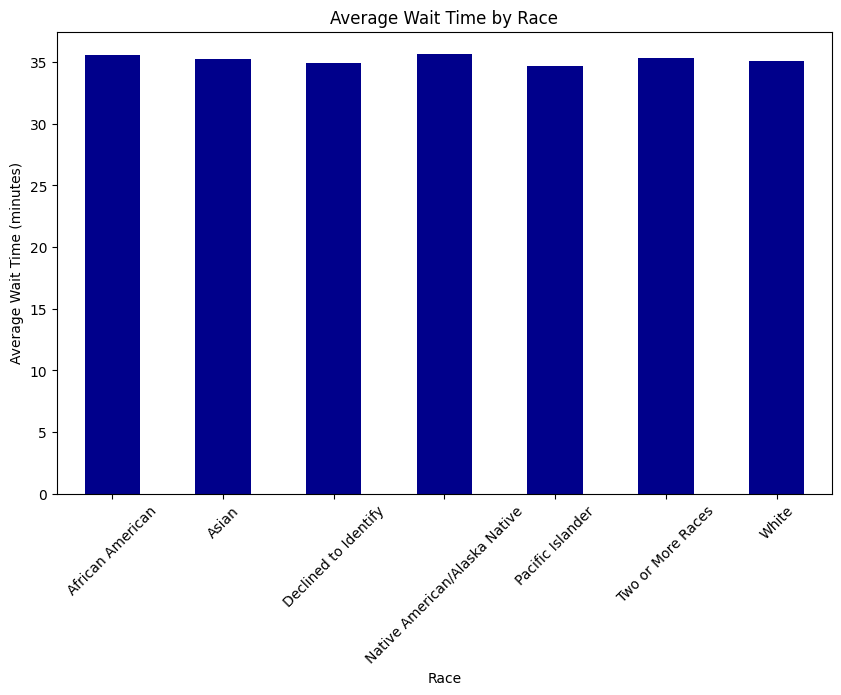

In [ ]:
# Group by Race and calculate the average Wait Time
race_wait_time = df.groupby('Patient Race', observed=True)['Patient Waittime'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
race_wait_time.plot(kind='bar', color='darkblue')
plt.title('Average Wait Time by Race')
plt.xlabel('Race')
plt.ylabel('Average Wait Time (minutes)')
plt.xticks(rotation=45)
plt.show()
plt.close()


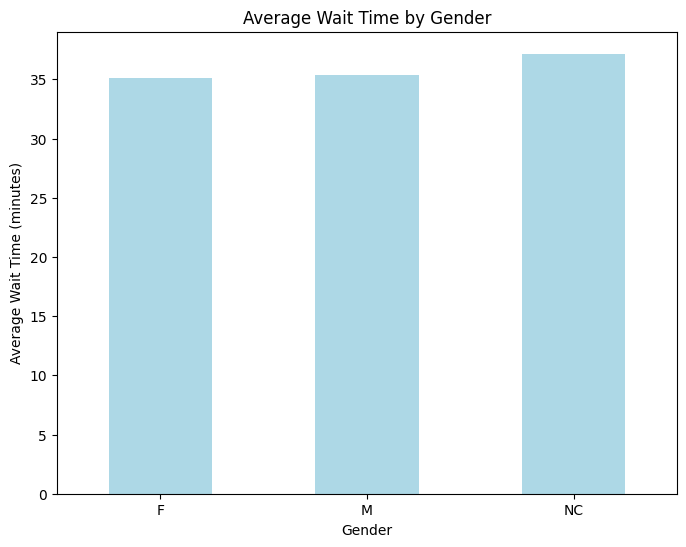

In [ ]:
# Group by Gender and calculate the average Wait Time
gender_wait_time = df.groupby('Patient Gender', observed=True)['Patient Waittime'].mean()

# Plot the results
plt.figure(figsize=(8, 6))
gender_wait_time.plot(kind='bar', color='lightblue')
plt.title('Average Wait Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Wait Time (minutes)')
plt.xticks(rotation=0)
plt.show()
plt.close()


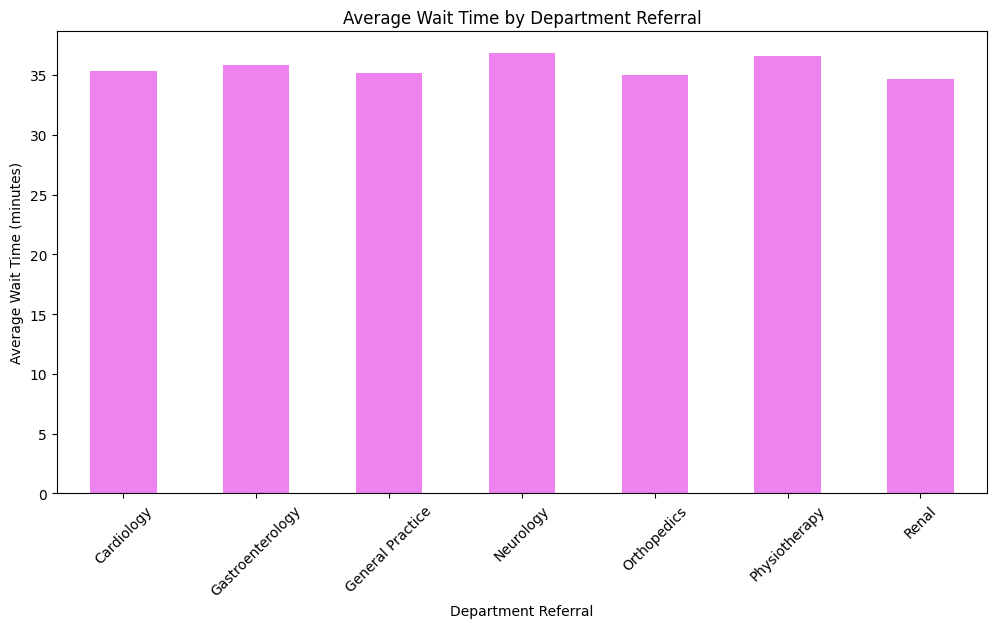

In [28]:
# Group by Department Referral and calculate the average Wait Time
referral_wait_time = df.groupby('Department Referral')['Patient Waittime'].mean()

# Plot the results
plt.figure(figsize=(12, 6))
referral_wait_time.plot(kind='bar', color='violet')
plt.title('Average Wait Time by Department Referral')
plt.xlabel('Department Referral')
plt.ylabel('Average Wait Time (minutes)')
plt.xticks(rotation=45)
plt.show()
plt.savefig(os.path.join(output_directory, 'referral_wait_time.png'))
plt.close()
